# Functions

In [4]:
from keras import backend as K
K.tensorflow_backend._get_available_gpus()

Using TensorFlow backend.


[]

In [7]:
#!/usr/bin/env python3
# -*- coding: utf-8 -*-
"""
Created on Wed Mar 28 13:00:48 2018

@author: rniel
"""
dataset_path = "datasets/polarization/"

def open_uci(x_=[],y_=[]):
    import numpy as np

    file  = open(dataset_path+"imdb_labelled.txt", "rt")
    content = file.read()
    contents=[]
    contents=content.split("\n")
    del contents[-1]

    for c in contents:
        temp=c.split("\t")
        x.append(temp[0])
        y.append(int(temp[1]))

    file  = open(dataset_path+"amazon_cells_labelled.txt", "rt")
    content = file.read()
    contents=[]
    contents=content.split("\n")
    del contents[-1]


    for c in contents:
        temp=c.split("\t")
        x_.append(temp[0])
        y_.append(int(temp[1]))

    file  = open(dataset_path+"yelp_labelled.txt", "rt")
    content = file.read()
    contents=[]
    contents=content.split("\n")
    del contents[-1]


    for c in contents:
        temp=c.split("\t")
        x.append(temp[0])
        y.append(int(temp[1]))
    return x_,y_

def open_book(x_=[],y_=[]):
    file  = open(dataset_path+"book.txt", "rt")


    nb_duplicate = 0

    content = file.read()
    contents=[]
    contents=content.split("\n")
    del contents[-1]
    del contents[-1]

    for c in contents:
        temp=c.split("\t")
        if(temp[1] in x_):
            nb_duplicate+=1
        else : 
            x_.append(temp[1])
            y_.append(int(temp[0]))  
    return x_,y_

def open_movie(x_=[],y_=[]):
    file  = open(dataset_path+"rt-polarity-neg.txt", "rt",encoding = "ISO-8859-1")

    content = file.read()
    contents=[]
    contents=content.split("\n")
    del contents[-1]
    del contents[-1]

    for i in range(len(contents)):
        x_.append(contents[i])
        y_.append(0)

    file  = open(dataset_path+"rt-polarity-pos.txt", "rt",encoding = "ISO-8859-1")
    content = file.read()
    contents=[]
    contents=content.split("\n")
    del contents[-1]
    del contents[-1]

    for i in range(len(contents)):
        x_.append(contents[i])
        y_.append(1)    
    return x_,y_

def pretreatment(sentences):
    # This function take a list of sentences and treat them to remove all punctuation mark and higher case
    to_delete = [",",".","-","!","?",":","*",")","(","'",'"',"\n","0","1","2","3","4","5","6","7","8","9"]

    for i in range(len(sentences)):
        for t in to_delete:
            sentences[i] = sentences[i].replace(t," ")

    ret_sentences = []
    for s in sentences:
        ret_sentences.append(s.split(" "))

    for i in range(len(sentences)):
        ret_sentences[i]=[w for w in ret_sentences[i] if w!=""]

    for i in range(len(ret_sentences)):
        for j in range(len(ret_sentences[i])) :
            ret_sentences[i][j]=ret_sentences[i][j].lower()
    return ret_sentences

def vectorization(sentences,vectors,word_length=300,max_len=50,adaptable_len=False):
    """ This function transform an array of list of words (the splitted sentences) into a array of list of vectors 
            representing the words thanks to an already trained word2Vec model
            
        Keyword arguments:
        sentences -- The different sentences you want to vectorize
        word2vec_model -- An already trained gensim Word2Vec model
        word_length -- The number of dimension of the vectors representing the words (default 300) 
        max_len -- The maximum length of a sentence (default 50) 
        adaptable_len -- A boolean allowing to adapt the maximum length to the longest sentence in your dataset
    """
    sentences_v=[]
    unusued_word=[]
    
    import nltk
    from nltk.corpus import stopwords
    import numpy as np
    sp_words = set(stopwords.words('english'))    
    
    for s in sentences:
        temp=[]
        for w in s :
            if(w not in sp_words):
                try :
                    temp.append(np.float32(vectors[w]))
                except : 
                    unusued_word.append(w)
        sentences_v.append(temp)
        
    if (adaptable_len == True):
        for s in sentences_v:
            if(len(s)>max_len):
                max_len=len(s)
                
    for s in sentences_v:
        sentence_length = len(s)
        if(sentence_length<max_len):    
            for j in range(max_len-sentence_length):
                s.append([0]*word_length)
    return sentences_v,max_len

In [8]:
def load_google_word2vec(vocabulary_size = 300000, path = 'lib/GoogleNews-vectors-negative300.bin'):
    from gensim.models import KeyedVectors
    # load the google word2vec model
    model = KeyedVectors.load_word2vec_format(path, binary=True , limit=vocabulary_size)

    # calculate: (king - man) + woman = ?
    #result = model.most_similar(positive=['woman', 'king'], negative=['man'], topn=1)
    #print(result)

    return model


In [11]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /home/robin/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [9]:
x,y = open_book()
x,y = open_movie(x,y)
print(len(x))
model = load_google_word2vec()
sentences_v,max_len = vectorization(pretreatment(x),model,word_length=300,adaptable_len=True)

12070


# Dimension transformation for SVM

In [8]:
import numpy as np
sentences_v = np.array(sentences_v)
sentences_v_svm = np.reshape(sentences_v,(sentences_v.shape[0],sentences_v.shape[1]*sentences_v.shape[2]))

# Word2Vec part

 ### Training of the Word2Vec model

In [8]:
from gensim.models.word2vec import Word2Vec
model = Word2Vec(sentences, size=200, min_count=20, workers=4,sorted_vocab=1)
model.train(sentences,total_examples=len(sentences), epochs=10)

(1107190, 2402790)

### Loading of the already trained models

In [51]:
from gensim.models.word2vec import Word2Vec
model = Word2Vec.load('variables/review_rating/word2vec/300/model_300_Movie_elec')

In [31]:
from gensim.models.word2vec import Word2Vec
model = Word2Vec.load('variables/review_rating/word2vec/200/model_200_elec')

### Saving the variables for computation time gain

In [9]:
import numpy as np 
np.save("variables/sentences_v_google.npy",sentences_v)
np.save("variables/y.npy",y)

### Loading the variables

In [1]:
import numpy as np 
sentences_v = np.load("variables/sentences_v_google.npy")
y = np.load("variables/y.npy")

# Splitting of the data into train and test set

In [10]:
from sklearn.model_selection import train_test_split
import numpy as np
x_vec_train,x_vec_test,y_vec_train,y_vec_test = train_test_split(sentences_v,y,test_size=0.2,random_state=42)
x_vec_train=np.array(x_vec_train)
x_vec_test=np.array(x_vec_test)
from keras.utils import to_categorical
y_vec_train=to_categorical(y_vec_train)
y_vec_test=to_categorical(y_vec_test)  

# Splitting of the data into train and test set (svm)

In [9]:
from sklearn.model_selection import train_test_split
import numpy as np
x_vec_train,x_vec_test,y_vec_train,y_vec_test = train_test_split(sentences_v_svm,y,test_size=0.2,random_state=42)
x_vec_train=np.array(x_vec_train)
x_vec_test=np.array(x_vec_test)

In [19]:
sub_sampling = 2000
x_vec_train = x_vec_train[:sub_sampling]
y_vec_train = y_vec_train[:sub_sampling]

# Neural network creation

In [15]:
# Neural Network
def model_creation():
    
    WORD_LENGTH=300
    max_len=50
    
    from keras.models import Sequential
    from keras.layers import Dense, Activation,Convolution1D,Flatten,MaxPooling1D,Conv1D,LSTM
    from keras.layers import Dropout

    NN1 = Sequential()

    NN1.add(Dense(max_len, activation='relu',input_shape=(max_len,WORD_LENGTH)))
    NN1.add(Dropout(0.5))
    
    NN1.add(Convolution1D(64,kernel_size=10,activation='relu',border_mode='causal',input_shape=(max_len,WORD_LENGTH)))
    NN1.add(Dropout(0.5))
    
    NN1.add(MaxPooling1D(pool_size=2, strides=None, padding='same'))

    NN1.add(LSTM(50))
    NN1.add(Dropout(0.5))
    
    #NN1.add(Flatten())    

    NN1.add(Dense(1024, activation='relu'))
    NN1.add(Dropout(0.5))
       
    NN1.add(Dense(1024, activation='relu'))
    NN1.add(Dropout(0.5))
       
    NN1.add(Dense(2, activation='softmax'))

    NN1.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
    return NN1

In [15]:

functions = []

512.0

In [29]:
functions.append(model_creation)

In [6]:
NN= model_creation()
NN.summary()

/home/robin/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:16: UserWarning: Update your `Conv1D` call to the Keras 2 API: `Conv1D(64, kernel_size=10, activation="relu", input_shape=(50, 300), padding="causal")`
  app.launch_new_instance()


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_13 (Dense)             (None, 50, 50)            15050     
_________________________________________________________________
dropout_16 (Dropout)         (None, 50, 50)            0         
_________________________________________________________________
conv1d_4 (Conv1D)            (None, 50, 64)            32064     
_________________________________________________________________
dropout_17 (Dropout)         (None, 50, 64)            0         
_________________________________________________________________
max_pooling1d_4 (MaxPooling1 (None, 25, 64)            0         
_________________________________________________________________
lstm_4 (LSTM)                (None, 50)                23000     
_________________________________________________________________
dropout_18 (Dropout)         (None, 50)                0         
__________

# Spliting between test and valid (deep)

In [56]:
x_vec_test,x_vec_valid,y_vec_test,y_vec_valid =  train_test_split(x_vec_test,y_vec_test,test_size=0.5,random_state=42)
print("Nombre de données de validation : "+str(len(x_vec_valid)))
print("Nombre de données de test : "+str(len(x_vec_test)))

Nombre de données de validation : 441
Nombre de données de test : 441


# Spliting between test and valid (svm)

In [56]:
x_vec_test,x_vec_valid,y_vec_test,y_vec_valid =  train_test_split(x_vec_test,y_vec_test,test_size=0.5,random_state=42)
print("Nombre de données de validation : "+str(len(x_vec_valid)))
print("Nombre de données de test : "+str(len(x_vec_test)))

Nombre de données de validation : 441
Nombre de données de test : 441


# Training of the model

In [16]:
NN = model_creation()
hist_google = NN.fit(x_vec_train, y_vec_train, epochs=10, batch_size=64,validation_split=0.1)

/home/robin/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:16: UserWarning: Update your `Conv1D` call to the Keras 2 API: `Conv1D(64, kernel_size=10, activation="relu", input_shape=(50, 300), padding="causal")`
  app.launch_new_instance()


Train on 8690 samples, validate on 966 samples
Epoch 1/10
8690/8690 [==============================] - 9s 1ms/step - loss: 0.6589 - acc: 0.5747 - val_loss: 0.5303 - val_acc: 0.7588
Epoch 2/10
8690/8690 [==============================] - 8s 946us/step - loss: 0.5080 - acc: 0.7687 - val_loss: 0.4779 - val_acc: 0.7785
Epoch 3/10
8690/8690 [==============================] - 8s 976us/step - loss: 0.4651 - acc: 0.7876 - val_loss: 0.4508 - val_acc: 0.7816
Epoch 4/10
8690/8690 [==============================] - 9s 1ms/step - loss: 0.4476 - acc: 0.7994 - val_loss: 0.4502 - val_acc: 0.7795
Epoch 5/10
8690/8690 [==============================] - 9s 1ms/step - loss: 0.4287 - acc: 0.8100 - val_loss: 0.4467 - val_acc: 0.7857
Epoch 6/10
8690/8690 [==============================] - 10s 1ms/step - loss: 0.4087 - acc: 0.8189 - val_loss: 0.4350 - val_acc: 0.7888
Epoch 7/10
8690/8690 [==============================] - 10s 1ms/step - loss: 0.3987 - acc: 0.8252 - val_loss: 0.4426 - val_acc: 0.7836
Epoch 8/1

In [17]:
NN.evaluate(x_vec_test,y_vec_test)

2414/2414 [==============================] - 1s 508us/step


[0.44020758145785865, 0.8024026512507081]

# SVM

In [20]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV

clf = SVC()

param_grid = [
  {'C': [1,10], 'gamma': [0.01], 'kernel': ['rbf']}
 ]

grid = GridSearchCV(clf,param_grid)
grid.fit(x_vec_train,y_vec_train)
grid.score(x_vec_test,y_vec_test)

0.7224523612261806

In [11]:
from sklearn.svm import SVC

clf = SVC(C=1,gamma=0.1,kernel = "rbf")
clf.fit(x_vec_train,y_vec_train)

SVC(C=1, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.1, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [13]:
clf.score(x_vec_test,y_vec_test)

0.596106048053024

# Plotting of validation curve

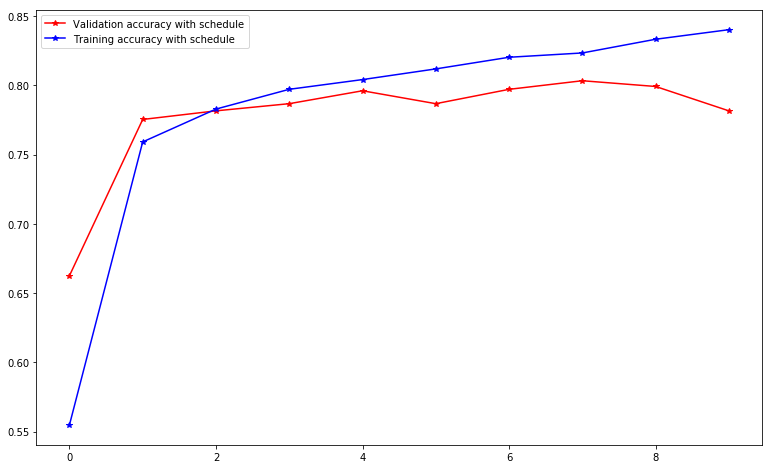

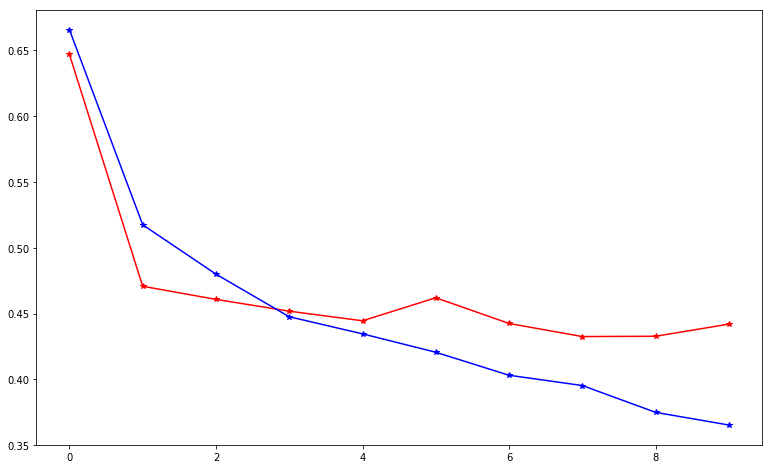

In [17]:
from matplotlib import pyplot as plt

plt.figure(figsize=(13,8))

plt.plot(hist_google.history["val_acc"],'r*-')
plt.plot(hist_google.history["acc"],'b*-')
plt.legend(("Validation accuracy with schedule","Training accuracy with schedule"))
plt.savefig("documents/Acc_google_new")
plt.show()    

plt.figure(figsize=(13,8))
plt.plot(hist_google.history["val_loss"],'r*-')
plt.plot(hist_google.history["loss"],'b*-')
plt.show()    

# Training of the model on all the data

In [11]:
from keras.utils import to_categorical
Final = model_creation()
Final.fit(np.array(sentences_v),to_categorical(y),epochs=30,batch_size=100)

/home/robin/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:16: UserWarning: Update your `Conv1D` call to the Keras 2 API: `Conv1D(64, kernel_size=10, activation="relu", input_shape=(50, 300), padding="causal")`
  app.launch_new_instance()


ValueError: Error when checking input: expected dense_1_input to have 3 dimensions, but got array with shape (4410, 50)

# Cross validation and model comparaison

In [12]:
def time_estimation_cross_val(nb_epochs,nb_s_epoch,nb_split):
    nb_min = (nb_epochs*nb_s_epoch*nb_split*nb_split)/60
    print("The cross_validation will take around : "+str(nb_min)+" mn")
    return nb_min
    
def cross_val(model_function,x_train,y_train,nb_splits,nb_epochs):
    """ This function allows to do a cross validation over a keras model
        Keyword arguments:
        model_function -- A function returning your model
        x_train -- The train data
        y_train -- The train target
        nb_splits -- The number of folds 
        nb_epochs -- The number of epochs you want to train your network with 
                     /!\ One validation will be a total of nb_folds*nb_epochs total number of epochs
    """
    import time    
    start_time = time.time()
    
    indices = np.linspace(0,len(x_train)-1,num=nb_splits+1,dtype=int)
    split_data = []

    # Creation of the splits
    split_data.append((x_train[indices[0]:indices[1]],y_train[indices[0]:indices[1]]))
    for i in range(1,len(indices)-1):
        split_data.append((x_train[indices[i]+1:indices[i+1]],y_train[indices[i]+1:indices[i+1]]))

    # Cross val    
    score = []
    for i in range(nb_splits):
        model = model_function()
        valid = split_data[i]
        for j in range(nb_splits):
            if (j != i):
                model.fit(split_data[j][0],split_data[j][1],epochs=nb_epochs,batch_size=150)
        score.append(model.evaluate(valid[0],valid[1]))
        
    std = np.std([a[1] for a in score])
    mean = np.mean([a[1] for a in score])
    
    print("Accruracy neural network: "+str(mean*100)+"% +- "+str(std*100)+"%")
    print("--- %s minutes elapsed---" % ((time.time() - start_time)/60))

    return model,score,(mean,std)


def multi_cross_val(model_functions,x_train,y_train,nb_splits,nb_epochs):
    """ This function allows to compare different models over a k-fold cross validation
        Keyword arguments:
        model_functions -- A list containing the functions returning the different models you want to test
        x_train -- The train data
        y_train -- The train target
        nb_splits -- The number of folds 
        nb_epochs -- The number of epochs you want to train your network with 
                     /!\ One validation will be a total of nb_folds*nb_epochs total number of epochs
    """
    import time
    
    start_time = time.time()
    
    indices = np.linspace(0,len(x_train)-1,num=nb_splits+1,dtype=int)
    split_data = []

    # Creeation of the splits
    split_data.append((x_train[indices[0]:indices[1]],y_train[indices[0]:indices[1]]))
    for i in range(1,len(indices)-1):
        split_data.append((x_train[indices[i]+1:indices[i+1]],y_train[indices[i]+1:indices[i+1]]))

    # Cross val    
    score = []
    for i in range(nb_splits):
        print("Split no :"+str(i))
        models = [f() for f in model_functions]
        valid = split_data[i]
        for j in range(nb_splits):
            if (j != i):
                for m in models :
                    try : 
                        m.fit(split_data[j][0],split_data[j][1],epochs=nb_epochs,batch_size=150)
                    except :
                        print(m.summary())
        for k in range(len(models)) :
            score.append((k,models[k].evaluate(valid[0],valid[1])))
    std = {}
    mean = {}
    
    for i in range(len(models)):
        tmp = [s for s in score if s[0]==i]
        std[i]=np.std([a[1][1] for a in tmp])
        mean[i]=np.mean([a[1][1] for a in tmp])

    for k in mean.keys():
        print("Accruracy neural network"+str(k) +" : "+str(mean[k]*100)+"% +- "+str(std[k]*100)+"%")
    
    print("--- %s minutes elapsed---" % ((time.time() - start_time)/60))

    return models,score,mean,std

In [ ]:
time_estimation_cross_val(80,2,3)

In [ ]:
help(multi_cross_val)

In [42]:
NN,score, printing = cross_val(model_creation,x_vec_train,y_vec_train,3,32)

/home/robin/.local/lib/python3.6/site-packages/ipykernel_launcher.py:16: UserWarning: Update your `Conv1D` call to the Keras 2 API: `Conv1D(64, kernel_size=10, activation="relu", input_shape=(50, 300), padding="causal")`
  app.launch_new_instance()


Epoch 1/32
4017/4017 [==============================] - 5s 1ms/step - loss: 0.6936 - acc: 0.4996
Epoch 2/32
4017/4017 [==============================] - 4s 1ms/step - loss: 0.6937 - acc: 0.4897
Epoch 3/32
4017/4017 [==============================] - 4s 1ms/step - loss: 0.6876 - acc: 0.5405
Epoch 4/32
4017/4017 [==============================] - 4s 1ms/step - loss: 0.6202 - acc: 0.6652
Epoch 5/32
4017/4017 [==============================] - 4s 1ms/step - loss: 0.5893 - acc: 0.7137
Epoch 6/32
4017/4017 [==============================] - 5s 1ms/step - loss: 0.5422 - acc: 0.7493
Epoch 7/32
4017/4017 [==============================] - 5s 1ms/step - loss: 0.5132 - acc: 0.7720
Epoch 8/32
4017/4017 [==============================] - 4s 1ms/step - loss: 0.5039 - acc: 0.7772
Epoch 9/32
4017/4017 [==============================] - 4s 1ms/step - loss: 0.4881 - acc: 0.7819
Epoch 10/32
4017/4017 [==============================] - 4s 1ms/step - loss: 0.4754 - acc: 0.7986
Epoch 11/32
4017/4017 [======

In [69]:
model_functions = [model_creation]

In [33]:
NNs,score,mean,std = multi_cross_val(functions,x_vec_train,y_vec_train,3,25)

Split no :0
Instructions for updating:
`NHWC` for data_format is deprecated, use `NWC` instead


/home/robin/.local/lib/python3.6/site-packages/ipykernel_launcher.py:16: UserWarning: Update your `Conv1D` call to the Keras 2 API: `Conv1D(64, kernel_size=10, activation="relu", input_shape=(50, 300), padding="causal")`
  app.launch_new_instance()


Epoch 1/25
1175/1175 [==============================] - 1s 744us/step - loss: 0.7043 - acc: 0.5013
Epoch 2/25
1175/1175 [==============================] - 0s 171us/step - loss: 0.6944 - acc: 0.5115
Epoch 3/25
1175/1175 [==============================] - 0s 177us/step - loss: 0.6901 - acc: 0.5251
Epoch 4/25
1175/1175 [==============================] - 0s 167us/step - loss: 0.6858 - acc: 0.5370
Epoch 5/25
1175/1175 [==============================] - 0s 163us/step - loss: 0.6813 - acc: 0.5609
Epoch 6/25
1175/1175 [==============================] - 0s 162us/step - loss: 0.6807 - acc: 0.5762
Epoch 7/25
1175/1175 [==============================] - 0s 197us/step - loss: 0.6645 - acc: 0.6111
Epoch 8/25
1175/1175 [==============================] - 0s 230us/step - loss: 0.6585 - acc: 0.6009
Epoch 9/25
1175/1175 [==============================] - 0s 227us/step - loss: 0.6496 - acc: 0.6247
Epoch 10/25
1175/1175 [==============================] - 0s 207us/step - loss: 0.6251 - acc: 0.6306
Epoch 11/

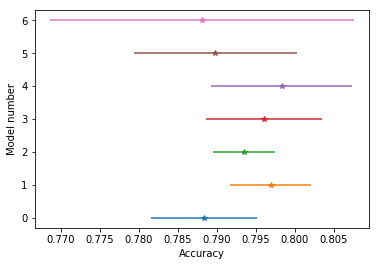

In [34]:
import matplotlib.pyplot as plt
import numpy as np

for i in range(len(mean)):
    mean_tmp = list(mean.values())
    std_tmp = list(std.values())
    plt.errorbar(mean_tmp[i],i,xerr=std_tmp[i], linestyle='--', marker='*')
    
plt.xlabel("Accuracy")
plt.ylabel("Model number")
plt.savefig('documents/Cross_val_graph.png', bbox_inches='tight')
plt.show()


# Recuperation of the best model

In [28]:
best = NN1

In [29]:
best.evaluate(x_vec_test,y_vec_test)

441/441 [==============================] - 0s 293us/step


[0.5740751975517965, 0.8616780042648315]

# Evaluation of the model on the test set

In [103]:
for nn in NNs :
    print(nn.evaluate(x_vec_test,y_vec_test))


882/882 [==============================] - 0s 162us/step
[0.4740270571508646, 0.7981859411782418]
882/882 [==============================] - 0s 220us/step
[0.43143712230820774, 0.8004535150095449]
882/882 [==============================] - 0s 374us/step
[0.4472087235137178, 0.80272108870569]
882/882 [==============================] - 0s 436us/step
[0.47223375092287995, 0.7857142859846016]


# Saving of the model

In [14]:
def save_model(model,name,path):
    model_json = model.to_json()
    with open(path+name+".json", "w") as json_file:
        json_file.write(model_json)
    # serialize weights to HDF5
        model.save_weights(path+name+".h5")
        print("Saved model to disk")
        
def load_model(name,path):
    from keras.models import model_from_json
    # load json and create model
    json_file = open(path+name+'.json', 'r')
    loaded_model_json = json_file.read()
    json_file.close()
    loaded_model = model_from_json(loaded_model_json)
    # load weights into new model
    loaded_model.load_weights(path+name+".h5")
    print("Loaded model from disk")
    return loaded_model


In [118]:
save_model(NN,"Final","models/")

Saved model to disk


In [15]:
NN_loaded = load_model("labelled+books_final","models/")
NN_loaded.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

Loaded model from disk


In [16]:
NN_loaded.evaluate(x_vec_test,y_vec_test)

ValueError: Error when checking input: expected dense_39_input to have 3 dimensions, but got array with shape (882, 50)

# Utilisation of the model for live prediction

In [40]:
def vote(score):
    import numpy as np
    neg=[]
    pos=[]
    for s in score :
        neg.append(s[0][0])
        pos.append(s[0][1])
    sup_neg = [n for n in neg if n > 0.5]
    sup_pos = [p for p in pos if p > 0.5]

    return [np.mean(neg),np.mean(pos)]
    
def predict(sentence,word2Vec_model,model,max_len=50,word_length=200):
    import numpy as np
    sentence = sentence.split(" ")
    good_sentence = []
    unusued_words = []
    for i in range(len(sentence)):
        try :
            sentence[i]=sentence[i].lower()
            good_sentence.append(word2Vec_model.wv[sentence[i]])
        except : 
            unusued_words.append(sentence[i])
    sentence_length = len(good_sentence)
    
    if(sentence_length<max_len):    
        for j in range(max_len-sentence_length):
            good_sentence.append([0]*word_length)     
            
    if (sentence_length > max_len) :
        predictions = []
        ind = 0
        for i in range(int(np.ceil(sentence_length/max_len))):
            sent_tmp = good_sentence[ind:ind+max_len]
            if(len(sent_tmp)<max_len):
                for j in range(max_len-len(sent_tmp)):
                    sent_tmp.append([0]*word_length)    
            sent_tmp = np.array(sent_tmp)        
            sent_tmp = np.reshape(sent_tmp, (1,sent_tmp.shape[0], sent_tmp.shape[1]))
            try :
                predictions.append(model.predict(sent_tmp))
                ind+=max_len                    
            except : 
                print("Erreur au découpage no :"+str(i))
        return vote(predictions)
    
    good_sentence = np.array(good_sentence)        
    good_sentence = np.reshape(good_sentence, (1,good_sentence.shape[0], good_sentence.shape[1]))
    return np.squeeze(model.predict(good_sentence))

In [21]:
best=NN_loaded
sentence =input()
print(" Négatif        Positif")
print(predict(sentence,model,best))


 Négatif        Positif
[0.57874113 0.42125887]


/home/robin/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:21: DeprecationWarning: Call to deprecated `wv` (Attribute will be removed in 4.0.0, use self instead).


# Data opening for test

### First dataset

In [41]:
def test(word2Vec_model,model):
    # This function take an already trained model return the accuracy of the model over an external dataset 
    y=[]
    y_pred=[]
    cnt = 1

    with open("datasets/polarization/rt-polarity-neg.txt","rt",encoding = "ISO-8859-1") as fp:
            line = fp.readline()
            while line:
                y.append(0)
                y_pred.append(predict(line,word2Vec_model,model))
                line = fp.readline()
                cnt += 1
                
    with open("datasets/polarization/rt-polarity-pos.txt","rt",encoding = "ISO-8859-1") as fp:
            line = fp.readline()
            while line:
                y.append(1)
                y_pred.append(predict(line,word2Vec_model,model))
                line = fp.readline()
                cnt += 1
                
    print(str(cnt)+" lines tested")
    
    y_pred_trans=[]  
    
    for i in range(len(y_pred)):
        try : 
            if(y_pred[i][0]>y_pred[i][1]):
                y_pred_trans.append(0)
            else :
                y_pred_trans.append(1)
        except : 
            print("Bug ligne : "+str(i))
    from sklearn.metrics import confusion_matrix
    cf = confusion_matrix(y,y_pred_trans)
    acc = (cf[0][0]+cf[1][1])/(cf[0][0]+cf[1][1]+cf[0][1]+cf[1][0])
    print("Confusion matrix : \n "+ str (cf))
    print("Accuracy : "+ str(acc))
    

In [42]:
test(model,best)

10663 lines tested
Confusion matrix : 
 [[3643 1688]
 [1153 4178]]
Accuracy : 0.7335396736072032


In [39]:
models = []
for i in range(len(functions)) :
    models.append(functions[i]())
    models[i].fit(np.array(sentences_v),to_categorical(y),epochs=30,batch_size=100)
    print("Neural network "+str(i))
    test(model,models[i])

Epoch 1/30
4410/4410 [==============================] - 4s 857us/step - loss: 0.6928 - acc: 0.5204
Epoch 2/30
4410/4410 [==============================] - 1s 210us/step - loss: 0.6608 - acc: 0.6009
Epoch 3/30
4410/4410 [==============================] - 1s 205us/step - loss: 0.5886 - acc: 0.6902
Epoch 4/30
4410/4410 [==============================] - 1s 213us/step - loss: 0.5147 - acc: 0.7628
Epoch 5/30
4410/4410 [==============================] - 1s 198us/step - loss: 0.4738 - acc: 0.7785
Epoch 6/30
4410/4410 [==============================] - 1s 195us/step - loss: 0.4495 - acc: 0.7950
Epoch 7/30
4410/4410 [==============================] - 1s 195us/step - loss: 0.4296 - acc: 0.8000
Epoch 8/30
4410/4410 [==============================] - 1s 197us/step - loss: 0.4074 - acc: 0.8209
Epoch 9/30
4410/4410 [==============================] - 1s 197us/step - loss: 0.3888 - acc: 0.8340
Epoch 10/30
4410/4410 [==============================] - 1s 209us/step - loss: 0.3882 - acc: 0.8317
Epoch 11/

/home/robin/.local/lib/python3.6/site-packages/ipykernel_launcher.py:21: DeprecationWarning: Call to deprecated `wv` (Attribute will be removed in 4.0.0, use self instead).


10663 lines tested
Confusion matrix : 
 [[3427 1904]
 [1437 3894]]
Accuracy : 0.6866441568186081


/home/robin/.local/lib/python3.6/site-packages/ipykernel_launcher.py:16: UserWarning: Update your `Conv1D` call to the Keras 2 API: `Conv1D(64, kernel_size=10, activation="relu", input_shape=(50, 300), padding="causal")`
  app.launch_new_instance()


Epoch 1/30
4410/4410 [==============================] - 5s 1ms/step - loss: 0.6986 - acc: 0.5010
Epoch 2/30
4410/4410 [==============================] - 2s 506us/step - loss: 0.6732 - acc: 0.5685
Epoch 3/30
4410/4410 [==============================] - 2s 523us/step - loss: 0.5872 - acc: 0.6884
Epoch 4/30
4410/4410 [==============================] - 2s 528us/step - loss: 0.5293 - acc: 0.7476
Epoch 5/30
4410/4410 [==============================] - 2s 564us/step - loss: 0.4928 - acc: 0.7803
Epoch 6/30
4410/4410 [==============================] - 2s 557us/step - loss: 0.4610 - acc: 0.7866
Epoch 7/30
4410/4410 [==============================] - 2s 533us/step - loss: 0.4613 - acc: 0.7878
Epoch 8/30
4410/4410 [==============================] - 2s 531us/step - loss: 0.4293 - acc: 0.8066
Epoch 9/30
4410/4410 [==============================] - 2s 521us/step - loss: 0.4037 - acc: 0.8209
Epoch 10/30
4410/4410 [==============================] - 2s 517us/step - loss: 0.4018 - acc: 0.8197
Epoch 11/30

### Second dataset

In [44]:
import glob   
path = 'datasets/polarization/txt_sentoken/pos/*.txt'   
files=glob.glob(path)   
sentences_test = []
y_test = []
for file in files:
    f=open(file, 'r')  
    sentences_test.append(f.read())
    y_test.append(1)
    f.close()
    
path = 'datasets/polarization/txt_sentoken/neg/*.txt'   
files=glob.glob(path)
for file in files:
    f=open(file, 'r')  
    sentences_test.append(f.read())
    y_test.append(0)
    f.close()

In [45]:
y_pred = []
for s in sentences_test:
    y_pred.append(predict(s,model,best))

In [46]:
from sklearn.metrics import confusion_matrix
y_pred_trans=[]
i=0
for y_tmp in y_pred:
    i+=1
    if(y_tmp[0] > y_tmp[1]):
        y_pred_trans.append(0)
    else :
        y_pred_trans.append(1)
        
cf = confusion_matrix(y_test,y_pred_trans)
acc = (cf[0][0]+cf[1][1])/(cf[0][0]+cf[1][1]+cf[0][1]+cf[1][0])
print("Matrice de confusion : \n "+ str (cf))
print("Accuracy : "+ str(acc))

Matrice de confusion : 
 [[769 231]
 [277 723]]
Accuracy : 0.746
